<h3> DNA evolutionary models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h4> Jukas Cantor model

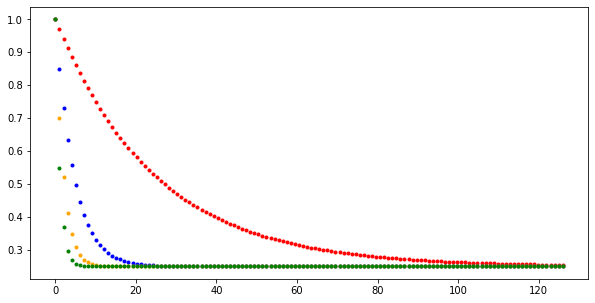

In [2]:
T = 125 #total time
alfa = np.array([0.01,0.05,0.1,0.15])
t = np.linspace(0,T+1,T+1)
colors = ["red","blue","orange","green"]

fig = plt.figure(1, figsize=(10, 5))

for i in range(len(alfa)):
    p = np.array([1])
    for j in range(T):
        p_X = (1-3*alfa[i])*p[-1]+alfa[i]*(1-p[-1]) #for a given nucleotide at a specific position
        p = np.append(p, p_X)
    plt.scatter(t, p, marker=".", c=colors[i])
    
plt.show()

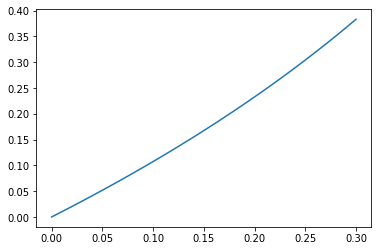

In [3]:
#dependence between D (observed) and d (evolutionary distance)
D = np.linspace(0, 0.3, 100)
d = -3/4*np.log(1-4*D/3)

plt.plot(D,d)
plt.show()

In [4]:
def JukasCantorDistance(align1, align2):
    import numpy as np
    
    N = len(align1)
    N_count = 0 #number of positions without gaps
    tt = 0 #number of transitions and transversions
    for i in range(N):
        if align1[i] == '-' or align2[i] == '-':
            continue
        else:
            N_count += 1
            if align1[i] != align2[i]:
                tt+=1
    D = tt/N_count
    d = -3/4*np.log(1-4*D/3)
    
    return round(d,3)

In [5]:
print(JukasCantorDistance("AATGC", "A-TGG"))  

0.304


<h4> Exercise: Consider the analogous Kimura model with $\alpha = 0.01$ and $\beta= 0.002$.

<h4> Exercise: Write a function KimuraDistance that takes two aligned sequences and returns an evolutionary distance according to Kimura Model.

In [6]:
from alignment import SequenceAlign, dotMatrix

In [91]:
seqA = 'TAGGCTATGCTATAGGCTTAAGCTAGGCTATATGCTATAGCGGCCAAAAT'
seqB = 'GGCTATATGCTATAGCGGCCAAAATTAGGCTATGCTATAGGCTTAAGCTA'

score, alignA, alignB = SequenceAlign(seqA, seqB)
print(score)
print(alignA) 
print(alignB) 
print("d = ", JukasCantorDistance(alignA, alignB))

-25.0
TAGGCT--ATGCTATAG--GCTTAAGCTAGGCTATATGCTATAGCGGCCAAAAT-
--GGCTATATGCTATAGCGGCCAAAATTAGGC--TATGCTATAG-GCTTAAGCTA
d =  0.233


In [92]:
#random sequences

seqA = 'TTGTTAACGGGCACGCGCTGCACCCCTCCTCGACGTAATATACGATACCAGTTATCACAGTCGGTTTCTCGTCACTTTTCCGCTACTACCGTCCCTGCGT'
seqB = 'CGGAGCACCTACCGGACTGTTTATTAGTATAGCTGAGTAGAACATGTGCGCCATTACAGCCGGGTATCCATCCTGACAGCACCTAGAAACATAGAGCGCG'


score, alignA, alignB = SequenceAlign(seqA, seqB)
print(score)
print(alignA) 
print(alignB) 
print("d = ", JukasCantorDistance(alignA, alignB))

-125.0
TTGTTAACGGGCACGCGCTGCACCCCTCCTCGAC-G--TA--A-TATA-C-GA-T--ACCA-GT----TATCACAGTC-GGT-TTC-TCGTCACTTTTCCGCTACTACCGTCCCTGCG-T
-----------------CGGAGCACCTACCGGACTGTTTATTAGTATAGCTGAGTAGAACATGTGCGCCATTACAGCCGGGTATCCATCCTGAC--AGCACCTAGAAACAT-AGAGCGCG
d =  0.426


<h3> Markov Models

In [96]:
import numpy as np
         # A    #C    #G    #T
A = {"A":[0.40, 0.30, 0.30, 0.00],
     "C":[0.25, 0.25, 0.25, 0.25], 
     "G":[0.00, 0.50, 0.25, 0.25], 
     "T":[0.10, 0.00, 0.00, 0.90]}

s = "A"
for i in range(3):
    s += np.random.choice(["A","C","G","T"], p = A[s[-1]])
print(s)


AACT


<h4> Exercise: Generate a random nucleotide sequence where there are no $GA$ and $AT$ subsequences.

<h3> Free-alignment methods

<h4> -> K-mers

<h4> Exercise: Write a function that takes as arguments a sequence and k (mer size) and returns a dictionary containing counts for all of them.


For example for ATGGTGG and k=3, we have ATG, TGG, GGT, GTG and TGG mers, so functions should return {'ATG': 1, 'TGG': 2, 'GGT': 1, 'GTG': 1}.

In [11]:
#k-mers

def kmers(seq, k = 3):
    d = {}
    N = len(seq)
    for i in range(N-k+1):
        mer = seq[i:(i+k)]
        if mer not in d.keys():
            d[mer] = 1
        else:
            d[mer] += 1
    return d


kmers("ATGGTGG")

{'ATG': 1, 'TGG': 2, 'GGT': 1, 'GTG': 1}

<h4> Exercise: Write a function that takes two sequences and k number (mer size) and returns Euclidean distance between them (counts for k-mers).

In [90]:
#k-comparison

def k_comparison(seq1, seq2, k=3):
    d1 = kmers(seq1, k)
    d2 = kmers(seq2, k)
    all_mers = []
    keysd1 = list(d1.keys())
    keysd2 = list(d2.keys())
    unique_mers = list(set(keysd1+keysd2))
    c1 = []
    c2 = []
    for elem in unique_mers:
        if elem in d1.keys():
            c1.append(d1[elem])
        else:
            c1.append(0)
            
    for elem in unique_mers:
        if elem in d2.keys():
            c2.append(d2[elem])
        else:
            c2.append(0)
    distance = 0
    for i in range(len(c1)):
        distance += (c1[i]-c2[i])**2
    return round(distance**0.5,2)


s1 = "ATGTGTG"
s2 = "CATGTG"
k_comparison(s1, s2)

1.73

<h4> -> Lempel-Ziv complexity

<h4> Exercise: Write a function that for a nucleotide sequence returns all words which occur within it.

What is a word? ATGCGCATCGGCT --> A|T|G|C|GC|AT|CG|GCT

In [97]:
#words

def WordSeq(seq):
    d=[]
    l=len(seq)
    i=0
    k=1
    n=0
    while i<l:
        while seq[i:i+k] in d and i+k<l:#Everytime the word is already in the list, k+=1 -> the function check with the next letter
            k+=1
        if seq[i:i+k] not in d:     
            d.append(seq[i:i+k])  #When the word isn't in d, the loop stops and the word is put into the list
        i+=k  #i becomes i+k to start to read again after the words that was already added
        k=1#we set again the value of k to 1 so that when the loops start again it start to check if the next letter is in the list    
    return d

 

print (WordSeq("ATGCGCATCGGCT"))

['A', 'T', 'G', 'C', 'GC', 'AT', 'CG', 'GCT']


<h4> Exercise: Write a function that takes two sequences and returns Lempel-Ziv complexity.

In [102]:
#comparison

def words_comparison(seq1, seq2):
    l1 = len(WordSeq(seq1))
    l2 = len(WordSeq(seq2))
    l3 = len(WordSeq(seq1+seq2))
    C = (l3 - min(l1,l2))/max(l1,l2)
    return C



s1 = "ATGTGTG"
s2 = "CATGTG"
words_comparison(s1, s2)

0.8

<h4> -> Chaos Game Representation - an another approach in free-alignment methods 

Steps:
    
- Conversion of nucleotide sequences to numerical ones (according to CGR forumla) -> Result: complex series
- Perform DFT for each series.
- Calculate Power Spectra.
- Elongate all spectra to the longest one.
- Comparison using UPGMA method.

In [48]:
import CGR

In [49]:
print(dir(CGR))

['CGRdistances', 'FS', 'LA', 'T_m', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'cg', 'cmath', 'fft', 'math', 'np', 'plt']


In [50]:
from CGR import CGRdistances #function that realise steps 1,2,3,4

In [51]:
#infulenzca viruses case study
v_sequences = []
v_names = []

with open('influenza_viruses', 'r') as f:
    for line in f:  
        line = line.rstrip() 
        if line.startswith('>'):
            v_names.append(line[1:])
        else:
            v_sequences.append(line.upper())

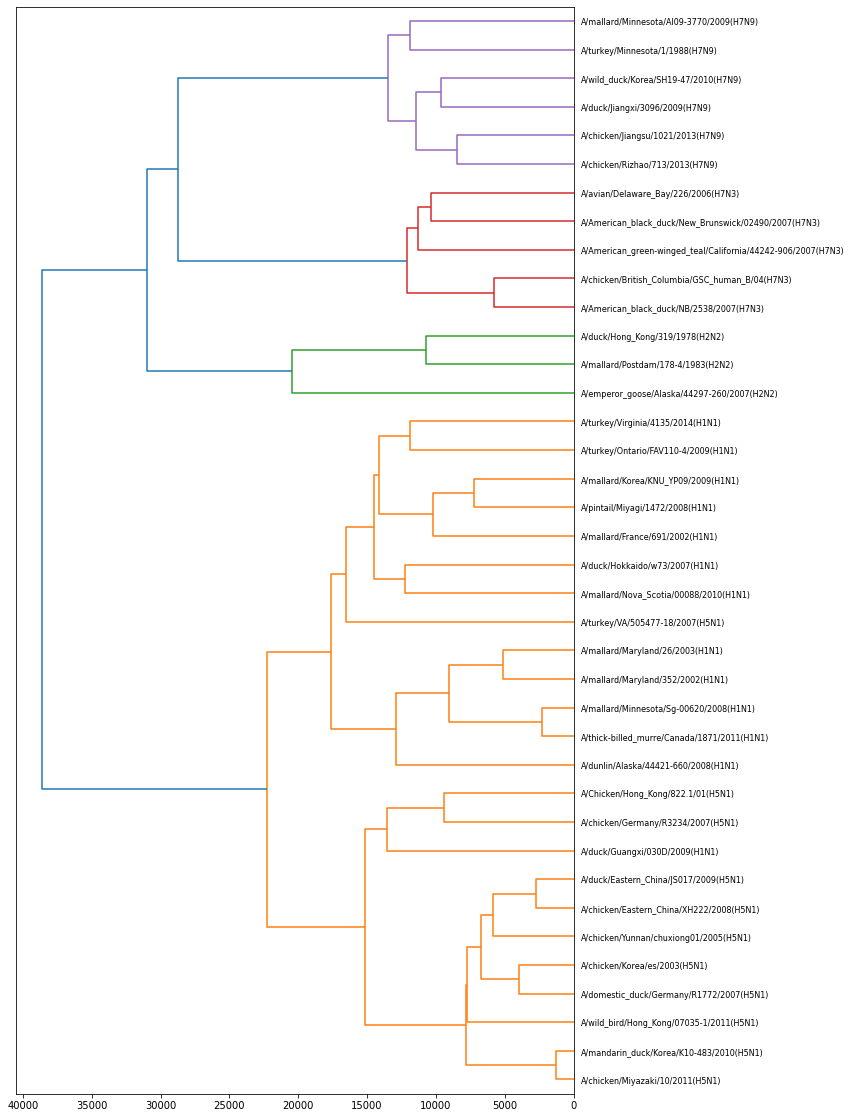

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy.spatial.distance import pdist  

X = pdist(CGRdistances(v_sequences)) #Distance matrix obtained from CGR+DFT procedure
dist = linkage(X, method="average")  #average = UPGMA method


fig = plt.figure(figsize=(10, 20))
dn = dendrogram(dist, labels = v_names, orientation = "left")
plt.show()

<h3> Python basics - supplementary materials

<h4> f-strings

In [15]:
x = 12
print("Variable x equals x")

Variable x equals x


In [16]:
x = 12
print(f"Variable x equals {x}")

Variable x equals 12


<h4> Functional programming

In [17]:
#traditional approach
def MyFunction(x):
    return x**2+3

In [18]:
print(MyFunction(-2))

7


Lambda functions

In [19]:
#We use lambda functions when we require a nameless (see examples with map/filter) in function for a short period of time.
#In Python, we generally use it as an argument to a higher-order functions

MyFunction2 = lambda x: x**2 + 3
print(MyFunction(2))

7


Map

In [20]:
x = [1,2,3,4]
y = list(map(MyFunction,x))  #apply function for every element in x
print(y)

[4, 7, 12, 19]


In [21]:
#map + lambda 

x = [1,2,3,4]
y = list(map(lambda a: a**2 + 3,x))  #apply lambda expression for every element in x
print(y)

[4, 7, 12, 19]


<h4> Exercise: Modify a list [1,2,3,4,5] by converting each element using  $5x+1$  transformation.

<h4> Exercise: For a list of sequences return a list containing the number of thymines for each of them.

Filter

In [24]:
x = [1,2,3,4]
y = list(filter(lambda a: a > 2,x))  #save only these element from list x which holds a condition in lambda
print(y)

[3, 4]


<h4> Exercise: Write a program which use filter() to make a list whose elements are even numbers between 1 and 20 (both included).

<h4> Exercise: For a list of sequences return a list of these sequences that contains a specific subsequence.

<h4> Try except

In [27]:
x = 1
y = 0

try:
    print(x/y)
except:
    print("An exception occurred")

An exception occurred


<h4> Break and Continue

In [29]:
#The break statement terminates the loop containing it.

for elem in "abcdef":
    if elem == "c":
        break
    print(elem)

a
b


In [30]:
#The continue statement is used to skip the rest of the code inside a loop for the current iteration only.
#Loop does not terminate but continues on with the next iteration.

for elem in "abcdef":
    if elem == "c":
        continue
    print(elem)

a
b
d
e
f


<h4> File handling

Save a text to a file

In [31]:
f = open("File.txt", "w")  #w - write
f.write("Python for bioinformatics")
f.close()

In [32]:
#Other way to do the same:

f = open('File.txt', 'w') 
try: 
    f.write('Python for bioinformatics') 
finally: 
    f.close() 

In [33]:
#The third approach, here: the with statement itself ensures proper acquisition and release of resources. 

with open('File.txt', 'w') as f: 
    f.write('Python for bioinformatics') 

Read a text from a file

In [34]:
#Read the content

f = open("File.txt", "r") #r-read
print(f.read()) 
f.close()

Python for bioinformatics


<h4> Example

In [38]:
text = "I like python language.\nIt is useful for data analysis.\nI can use it for bioinformatics analyses."  #\n - next line

f = open("File2.txt", "w")
f.write(text)
f.close()

In [39]:
f = open("File2.txt", "r")
print(f.read()) 
f.close()

I like python language.
It is useful for data analysis.
I can use it for bioinformatics analyses.


In [40]:
f2 = open("File2.txt", "r")

print(f2.readline())
print(f2.readline())
print(f2.readline())

f2.close()

I like python language.

It is useful for data analysis.

I can use it for bioinformatics analyses.


In [41]:
f3 = open("File2.txt", "r")
for line in f3:
    print(line)  
f3.close()

I like python language.

It is useful for data analysis.

I can use it for bioinformatics analyses.


In [42]:
x = []

f4 = open("File2.txt", "r")
for line in f4:
    x.append(line)

f4.close()

In [43]:
print(x)

['I like python language.\n', 'It is useful for data analysis.\n', 'I can use it for bioinformatics analyses.']


<h4> Exercise: Let's define two nucleotide sequences: seq1: ATGGGC and seq2: AGGGCT and save them to file using FASTA format.
